In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import copy
import plotly.express as px

#Pre-Processing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

#models
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Scipy
from scipy.spatial import distance

#Feature Selection
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#lefse
!pip install lefse
import lefse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 33.1 MB/s eta 0:00:00


**Importing Data**

In [ ]:
!git clone https://github.com/ihdavjar/LCBM_analysis.git

Cloning into 'LCBM_analysis'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 51 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), 13.00 MiB | 3.97 MiB/s, done.


**Data Preparation for the Lefse**

In [ ]:
data_1=pd.read_csv("/content/LCBM_analysis/feature-table.tsv")
data_1

,otu_id,SRR3991444,SRR3991609,SRR3991531,SRR3991495,SRR3991554,SRR3991568,SRR3991477,SRR3991372,SRR3991625,...,SRR3991455,SRR3991385,SRR3991623,SRR3991494,SRR3991502,SRR3991543,SRR3991594,SRR3991499,SRR3991582,taxonomy
0,f9e6e13db5e9e17c5ec67373a3304d57,6,0,1,13,0,11,6,8,5,...,2,3,3,15,0,0,3,3,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
1,e9a7d81ea11a1e900e5852db9d690582,4,3,0,19,0,13,6,14,16,...,2,6,2,18,0,0,2,4,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
2,869e4cf876405023c3e4436d89547ddf,3,1,0,3,0,0,13,28,0,...,0,1,8,1,3,23,0,0,6,d__Bacteria; p__Proteobacteria; c__Alphaproteo...
3,fac6f5c44c33a2c00a40c646fb20ce80,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,13200de5d753dd6a61efd16894024af9,3,0,4,0,16,13,12,0,11,...,5,6,4,9,15,50,0,0,5,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,21efca24acf781e1c8c0c4e3678d5789,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25,0,0,0,d__Bacteria
3603,845f5b3ab0040ffce5938be8813bc387,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24,0,0,0,d__Bacteria
3604,c365e1021f22e77fb392a08f87ec6c8e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24,0,0,0,d__Bacteria
3605,010a52f996ebf376427e339e12ebabe6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,23,0,0,0,d__Bacteria


In [ ]:
temp_data=np.array(data_1)
temp_otus=[]
for i in range(len(temp_data)):
  temp_otus.append("Otu"+str(i+1))

data_1["otu_id"]=temp_otus

data_1

,otu_id,SRR3991444,SRR3991609,SRR3991531,SRR3991495,SRR3991554,SRR3991568,SRR3991477,SRR3991372,SRR3991625,...,SRR3991455,SRR3991385,SRR3991623,SRR3991494,SRR3991502,SRR3991543,SRR3991594,SRR3991499,SRR3991582,taxonomy
0,Otu1,6,0,1,13,0,11,6,8,5,...,2,3,3,15,0,0,3,3,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
1,Otu2,4,3,0,19,0,13,6,14,16,...,2,6,2,18,0,0,2,4,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
2,Otu3,3,1,0,3,0,0,13,28,0,...,0,1,8,1,3,23,0,0,6,d__Bacteria; p__Proteobacteria; c__Alphaproteo...
3,Otu4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,Otu5,3,0,4,0,16,13,12,0,11,...,5,6,4,9,15,50,0,0,5,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,Otu3603,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25,0,0,0,d__Bacteria
3603,Otu3604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24,0,0,0,d__Bacteria
3604,Otu3605,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,24,0,0,0,d__Bacteria
3605,Otu3606,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,23,0,0,0,d__Bacteria


**Creating .taxonomy file**

In [ ]:
taxonomy_data=data_1[["otu_id","taxonomy"]]
taxonomy_data

,otu_id,taxonomy
0,Otu1,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
1,Otu2,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
2,Otu3,d__Bacteria; p__Proteobacteria; c__Alphaproteo...
3,Otu4,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,Otu5,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
...,...,...
3602,Otu3603,d__Bacteria
3603,Otu3604,d__Bacteria
3604,Otu3605,d__Bacteria
3605,Otu3606,d__Bacteria


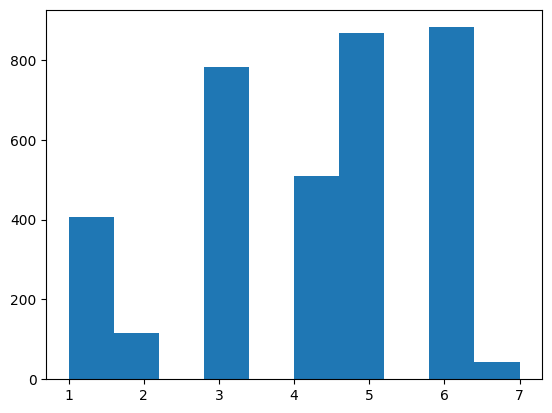

In [ ]:
temp_lens=[] #lengths of each taxonomy for a tax
temp_taxonomy=[]

temp_arr=list(taxonomy_data["taxonomy"])
for i in range(len(temp_arr)):
  temp=temp_arr[i].split(";")[0:7]

  temp_lens.append(len(temp))
  temp_taxonomy.append(temp)

plt.hist(temp_lens)
plt.show()

In [ ]:
print(temp_taxonomy[697])

['d__Bacteria', ' p__Firmicutes', ' c__Bacilli', ' o__Erysipelotrichales', ' f__Erysipelatoclostridiaceae', ' g__Asteroleplasma', ' s__uncultured_bacterium']


d__Bacteria; p__Firmicutes; c__Bacilli; o__Erysipelotrichales; f__Erysipelatoclostridiaceae; g__Asteroleplasma; s__uncultured_bacterium
d__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella; Bacteria_unclassified


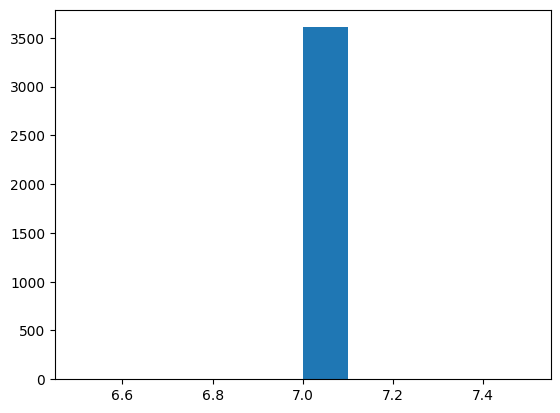

In [ ]:
#Adding Unclassified Labels
temp_new_taxonomy=[] #New taxonomical tags
temp_arr=list(taxonomy_data["taxonomy"])

for i in range(len(temp_arr)):
  temp=temp_arr[i].split(";")[0:7]
  if (len(temp)<7):
    temp_new_taxonomy.append(temp_arr[i]+(7-len(temp))*("; Bacteria_unclassified"))
  else:
    temp_new_taxonomy.append(temp_arr[i])

print(temp_new_taxonomy[697])
print(temp_new_taxonomy[6])

temp_lens=[] #lengths of each taxonomy for a taxa

temp_arr=temp_new_taxonomy
for i in range(len(temp_arr)):
  temp=temp_arr[i].split(";")[0:7]

  temp_lens.append(len(temp))
  temp_taxonomy.append(temp)

plt.hist(temp_lens)
plt.show()

In [ ]:
taxonomy_data["taxonomy"]=temp_new_taxonomy
taxonomy_data

<ipython-input-9-e0c44fbe2061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxonomy_data["taxonomy"]=temp_new_taxonomy


,otu_id,taxonomy
0,Otu1,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
1,Otu2,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
2,Otu3,d__Bacteria; p__Proteobacteria; c__Alphaproteo...
3,Otu4,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
4,Otu5,d__Bacteria; p__Proteobacteria; c__Gammaproteo...
...,...,...
3602,Otu3603,d__Bacteria; Bacteria_unclassified; Bacteria_u...
3603,Otu3604,d__Bacteria; Bacteria_unclassified; Bacteria_u...
3604,Otu3605,d__Bacteria; Bacteria_unclassified; Bacteria_u...
3605,Otu3606,d__Bacteria; Bacteria_unclassified; Bacteria_u...


In [ ]:
taxonomy_data.to_csv("taxonomy_data.csv",index=False)
# files.download("taxonomy_data.csv")

In [ ]:
org_data=pd.read_csv("/content/LCBM_analysis/feature-table.tsv")

taxonomy_arr=list(org_data["taxonomy"])
otu_ids=list(org_data["otu_id"])
print(taxonomy_arr)
print(otu_ids)

#Removing the taxonomy and the otu_ids from the feature table
org_data=org_data.drop(["otu_id","taxonomy"],axis=1)


temp_data=np.array(org_data)
temp_otus=[]
for i in range(len(temp_data)):
  temp_otus.append("Otu"+str(i+1))


#Adding the labels to feature table
org_data=org_data.T
org_data.columns=temp_otus

print(org_data)
temp_data=pd.read_csv("/content/LCBM_analysis/label_data.csv")
temp_data=temp_data.drop(['Unnamed: 0'],axis=1)
temp_data_np=np.array(temp_data)

print(temp_data)

dict_temp={}
for i in range(len(temp_data_np)):
  if (temp_data_np[i,1]=="Squamous cell carcinoma"):
    dict_temp[temp_data_np[i,0]]="Squamous"
  else:
    dict_temp[temp_data_np[i,0]]=temp_data_np[i,1]

l_temp_row=list(org_data.index)
temp_labels=[]

for i in range(len(l_temp_row)):
  if (dict_temp[l_temp_row[i]]=="Adenosquamous carcinoma"):
    org_data.drop([l_temp_row[i]],axis=0,inplace=True)
  else:
    temp_labels.append(dict_temp[l_temp_row[i]])


org_data_np=np.array(org_data)
org_data

org_data.insert(loc=0,column="label",value=0.03)
org_data.insert(loc=1,column="Group",value=list(org_data.index))
org_data.insert(loc=2,column="numOtus",value=3607)
org_data['treatment']=temp_labels


org_data.to_csv('complete_otus.csv',index=False)
files.download('complete_otus.csv')
org_data


['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,Otu1,Otu2,Otu3,Otu4,Otu5,Otu6,Otu7,...,Otu3599,Otu3600,Otu3601,Otu3602,Otu3603,Otu3604,Otu3605,Otu3606,Otu3607,treatment
SRR3991444,0.03,SRR3991444,3607,6,4,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,3607,0,3,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,3607,1,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,3607,13,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,3607,0,0,0,0,16,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,3607,0,0,3,0,15,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,3607,0,0,23,0,50,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,0.03,SRR3991594,3607,3,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,3607,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


**Data Analysis**

In [ ]:
org_data=pd.read_csv("/content/LCBM_analysis/feature-table.tsv")

taxonomy_arr=list(org_data["taxonomy"])
otu_ids=list(org_data["otu_id"])
print(taxonomy_arr)
print(otu_ids)

#Removing the taxonomy and the otu_ids from the feature table
org_data=org_data.drop(["otu_id","taxonomy"],axis=1)


#Adding the labels to feature table
org_data=org_data.T
temp_data=pd.read_csv("/content/LCBM_analysis/label_data.csv")
temp_data=temp_data.drop(['Unnamed: 0'],axis=1)
temp_data_np=np.array(temp_data)

print(temp_data)

dict_temp={}
for i in range(len(temp_data_np)):
  if (temp_data_np[i,1]=="Squamous cell carcinoma"):
    dict_temp[temp_data_np[i,0]]="Squamous"
  else:
    dict_temp[temp_data_np[i,0]]=temp_data_np[i,1]

l_temp_row=list(org_data.index)
temp_labels=[]

for i in range(len(l_temp_row)):
  if (dict_temp[l_temp_row[i]]=="Adenosquamous carcinoma"):
    org_data.drop([l_temp_row[i]],axis=0,inplace=True)
  else:
    temp_labels.append(dict_temp[l_temp_row[i]])

org_data["label"]=temp_labels

org_data_np=np.array(org_data)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temp_data=pd.read_csv("/content/LCBM_analysis/label_data.csv")
temp_data=temp_data.drop(["Unnamed: 0"],axis=1)
numpy_data=np.array(temp_data)
print(np.unique(numpy_data[:,1]))
temp_data

['Adenocarcinoma' 'Adenosquamous carcinoma' 'Squamous cell carcinoma']


,sample_id,labels
0,SRR3991333,Adenocarcinoma
1,SRR3991334,Adenocarcinoma
2,SRR3991335,Adenocarcinoma
3,SRR3991336,Adenocarcinoma
4,SRR3991337,Squamous cell carcinoma
...,...,...
278,SRR3991626,Adenocarcinoma
279,SRR3991627,Adenocarcinoma
280,SRR3991628,Adenocarcinoma
281,SRR3991629,Squamous cell carcinoma


**Category Barplot**

['Adenocarcinoma' 'Squamous']


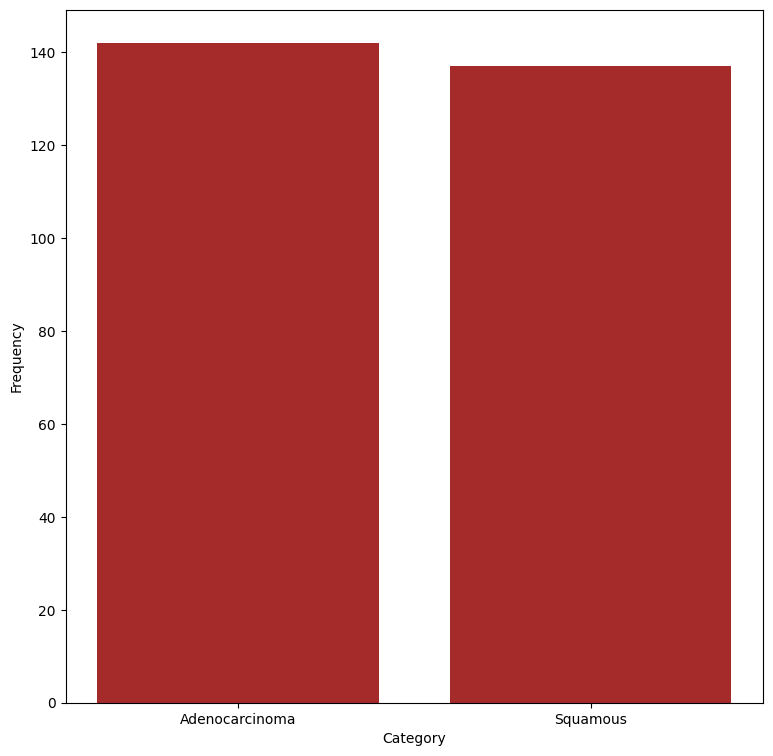

In [ ]:
labels_arr=list(org_data['label'])

temp_cates=np.unique(labels_arr)
print(temp_cates)

temp_values=[]
for i in range(len(temp_cates)):
  total=0
  for j in range(len(labels_arr)):
    if (labels_arr[j]==temp_cates[i]):
      total=total+1
  temp_values.append(total)

fig=plt.figure(figsize=(9,9))
plt.bar(temp_cates,temp_values,color='brown')
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

**Labels encoding**

In [ ]:
le = preprocessing.LabelEncoder()

org_data_np=np.array(org_data)

labels=le.fit_transform(org_data_np[:,len(org_data_np[0])-1])

org_data_np[:,len(org_data_np[0])-1]=labels

stan_data=pd.DataFrame(org_data_np,columns=org_data.columns,index=org_data.index)
stan_data

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,1
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,0
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,0
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,1
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0


**Visualisation Using Bray Curtis**

In [ ]:
def bray_curtis_array(l1,l2):
  bc=distance.braycurtis(l1,l2)
  return bc


def bray_curtis_comp(data):
  d_mat=[]

  for i in range(len(data)):
    d_mat1=[]
    for j in range(len(data)):
      temp_1=data[i,:len(data[0])-1]
      temp_2=data[j,:len(data[0])-1]
      d_mat1.append(bray_curtis_array(temp_1,temp_2))
    d_mat.append(d_mat1)
  d_mat=np.array(d_mat)
  return d_mat

bray_curtis_data=pd.DataFrame(bray_curtis_comp(org_data_np))

**Using PCA**

In [ ]:
bray_curtis_data_np=np.array(bray_curtis_data)

X = bray_curtis_data_np
pca = PCA(n_components=4)
pca.fit(X)

print(pca.explained_variance_ratio_)

x_new=pca.transform(X)

x=x_new[:,0]
y=x_new[:,1]
z=x_new[:,2]
z1=x_new[:,3]

[0.33404357 0.22891108 0.11003095 0.03665029]


In [ ]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
# df = px.data.iris()
fig = px.scatter_3d(x=x, y=y, z=z,
              color=org_data['label'])



# pio.write_image(fig, 'image.png',scale=7, width=1080, height=1080)
# files.download('image.png')

fig.show()

In [ ]:
fig = px.scatter(x=x, y=y,color=org_data['label'])
fig.show()

**Using the K-means to find the centroid**

238 41
[[-0.28982875 -0.26726207 -0.03204631  0.00324863]
 [ 1.68242055  1.5514237   0.18602491 -0.01885792]]


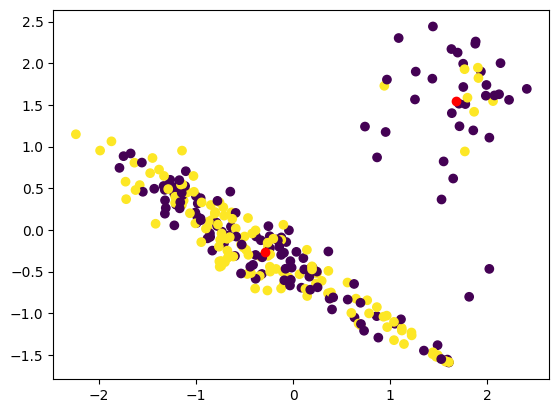

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x_new)

temp_l=list(kmeans.labels_)

print(temp_l.count(0),temp_l.count(1))

new_x=kmeans.cluster_centers_
print(new_x)
plt.scatter(x,y,c=org_data_np[:,len(org_data_np[0])-1])
plt.scatter(new_x[:,0],new_x[:,1],c='red')
plt.show()

**Using T-SNE**

In [ ]:
x_new=TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(X)

x=x_new[:,0]
y=x_new[:,1]

In [ ]:
fig = px.scatter(x=x, y=y,color=org_data['label'])
fig.show()

**Data in hand**

In [ ]:
org_data_np=np.array(org_data)
print(org_data)
print(stan_data)
print(org_data_np)

             0   1   2  3   4  5  6  7   8  9  ...  3598  3599  3600  3601  \
SRR3991444   6   4   3  3   3  3  3  2   2  2  ...     0     0     0     0   
SRR3991609   0   3   1  0   0  0  3  0   5  7  ...     0     0     0     0   
SRR3991531   1   0   0  0   4  0  0  0   3  0  ...     0     0     0     0   
SRR3991495  13  19   3  0   0  0  0  0  16  0  ...     0     0     0     0   
SRR3991554   0   0   0  0  16  0  0  0   0  0  ...     0     0     0     0   
...         ..  ..  .. ..  .. .. .. ..  .. ..  ...   ...   ...   ...   ...   
SRR3991502   0   0   3  0  15  0  0  0   0  0  ...     0     0     0     0   
SRR3991543   0   0  23  0  50  0  0  0   0  0  ...     0     0    36    27   
SRR3991594   3   2   0  0   0  1  0  0   1  0  ...     0     0     0     0   
SRR3991499   3   4   0  0   0  0  0  0   9  0  ...     0     0     0     0   
SRR3991582   0   0   6  0   5  0  0  0   0  0  ...     0     0     0     0   

            3602  3603  3604  3605  3606           label  
SRR3

**Splitting Data**

In [ ]:
stan_data_np=np.array(stan_data)
x_data=stan_data_np[:,0:len(org_data_np[0])-1]
y_data=stan_data_np[:,len(org_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

**Modelling**

In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [ ]:
model = LogisticRegression()
model = tree.DecisionTreeClassifier()
# model = LDA()
# model = RandomForestClassifier(max_depth=2, random_state=0)

**For a specific OTU**

In [ ]:
# sfs=SFS(model,k_features=20,forward=True,floating=True,cv=5)
# sfs.fit(x_train,y_train)

# temp_index=sfs.k_feature_idx_
# temp_cols=taxonomy_arr
# chosen_features=[]
# for i in range(len(temp_index)):
#   chosen_features.append(temp_cols[temp_index[i]])

# print(chosen_features)


# print('CV Score for s:')
# print(sfs.k_score_)

# fig1=plot_sfs(sfs.get_metric_dict())
# plt.show()

**Domain wise, we have only bacteria so no need to study that**

**Phyllum wise Analysis**

In [ ]:
l_cols=taxonomy_arr
print(l_cols)
print(len(l_cols))
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  print(temp)

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

In [ ]:
phyllum_labels=[]
count_no_phyllum=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)!=1):
    if (temp[1] not in phyllum_labels):
      phyllum_labels.append(temp[1])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==1):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the phyllum labels:-",count_no_phyllum)

print("No. of distinct phyllum are:-",len(phyllum_labels))
print(phyllum_labels)

Number of Taxa without the phyllum labels:- 407
No. of distinct phyllum are:- 20
[' p__Proteobacteria', ' p__Firmicutes', ' p__Actinobacteriota', ' p__Bacteroidota', ' p__Deinococcota', ' p__Patescibacteria', ' p__Bdellovibrionota', ' p__Cyanobacteria', ' p__Fusobacteriota', ' p__Campilobacterota', ' p__Verrucomicrobiota', ' p__Elusimicrobiota', ' p__Desulfobacterota', ' p__Myxococcota', ' p__Acidobacteriota', ' p__Chloroflexi', ' p__Methylomirabilota', ' p__Spirochaetota', ' p__Planctomycetota', ' p__Dependentiae']


In [ ]:
temp_dict={}
for i in range(len(phyllum_labels)):
  temp_dict[phyllum_labels[i]]=0

temp_dict

{' p__Proteobacteria': 0,
 ' p__Firmicutes': 0,
 ' p__Actinobacteriota': 0,
 ' p__Bacteroidota': 0,
 ' p__Deinococcota': 0,
 ' p__Patescibacteria': 0,
 ' p__Bdellovibrionota': 0,
 ' p__Cyanobacteria': 0,
 ' p__Fusobacteriota': 0,
 ' p__Campilobacterota': 0,
 ' p__Verrucomicrobiota': 0,
 ' p__Elusimicrobiota': 0,
 ' p__Desulfobacterota': 0,
 ' p__Myxococcota': 0,
 ' p__Acidobacteriota': 0,
 ' p__Chloroflexi': 0,
 ' p__Methylomirabilota': 0,
 ' p__Spirochaetota': 0,
 ' p__Planctomycetota': 0,
 ' p__Dependentiae': 0}

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)!=1):
      new_dict[temp[1]]=new_dict[temp[1]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

new_data=pd.DataFrame(temps_arr,columns=temp_columns)
print(temps_arr)

[[  38    9    2 ...    0    0    0]
 [ 160   62   54 ...    0    0    0]
 [ 504  105   63 ...    0    0    0]
 ...
 [ 161 1481    0 ...    0    0    0]
 [ 483  144   55 ...    0    0    0]
 [ 405   46    0 ...    0    0    0]]


In [ ]:
new_data

new_data1=copy.deepcopy(new_data)

print(new_data)
print(new_data1)

      p__Proteobacteria   p__Firmicutes   p__Actinobacteriota  \
0                    38               9                     2   
1                   160              62                    54   
2                   504             105                    63   
3                   571             170                     5   
4                   595             172                     6   
..                  ...             ...                   ...   
274                 436             192                   147   
275                1159               0                     0   
276                 161            1481                     0   
277                 483             144                    55   
278                 405              46                     0   

      p__Bacteroidota   p__Deinococcota   p__Patescibacteria  \
0                   0                 0                    0   
1                  51                 0                    0   
2                 204      

In [ ]:
new_data.insert(loc=0,column="label",value=0.50)
new_data.insert(loc=1,column="Group",value=np.linspace(1,279,279))
new_data.insert(loc=2,column="numOtus",value=len(phyllum_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_phylum.csv',index=False)
files.download('complete_phylum.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,p__Proteobacteria,p__Firmicutes,p__Actinobacteriota,p__Bacteroidota,p__Deinococcota,p__Patescibacteria,p__Bdellovibrionota,...,p__Elusimicrobiota,p__Desulfobacterota,p__Myxococcota,p__Acidobacteriota,p__Chloroflexi,p__Methylomirabilota,p__Spirochaetota,p__Planctomycetota,p__Dependentiae,treatment
0,0.5,1.0,20,38,9,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
1,0.5,2.0,20,160,62,54,51,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
2,0.5,3.0,20,504,105,63,204,1154,28,37,...,0,0,0,0,0,0,0,0,0,Squamous
3,0.5,4.0,20,571,170,5,239,1121,26,15,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
4,0.5,5.0,20,595,172,6,83,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.5,275.0,20,436,192,147,32,1628,7,20,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
275,0.5,276.0,20,1159,0,0,162,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
276,0.5,277.0,20,161,1481,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
277,0.5,278.0,20,483,144,55,32,1003,17,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
phylum_data_adeno=new_data1[new_data1["labels"]==0]
phylum_data_squamous=new_data1[new_data1["labels"]==1]

phylum_data_adeno.to_csv('adeno_phylum.csv')
files.download('adeno_phylum.csv')

phylum_data_squamous.to_csv('squamous_phylum.csv')
files.download('squamous_phylum.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data["treatment"]=le.fit_transform(new_data["treatment"])
new_data_np=np.array(new_data)
print(new_data_np)
x_data=new_data_np[:,3:len(new_data_np[0])-1]

print(x_data)
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[[  0.5   1.   20.  ...   0.    0.    1. ]
 [  0.5   2.   20.  ...   0.    0.    0. ]
 [  0.5   3.   20.  ...   0.    0.    1. ]
 ...
 [  0.5 277.   20.  ...   0.    0.    1. ]
 [  0.5 278.   20.  ...   0.    0.    0. ]
 [  0.5 279.   20.  ...   0.    0.    0. ]]
[[  38.    9.    2. ...    0.    0.    0.]
 [ 160.   62.   54. ...    0.    0.    0.]
 [ 504.  105.   63. ...    0.    0.    0.]
 ...
 [ 161. 1481.    0. ...    0.    0.    0.]
 [ 483.  144.   55. ...    0.    0.    0.]
 [ 405.   46.    0. ...    0.    0.    0.]]


[' p__Firmicutes', ' p__Deinococcota', ' p__Campilobacterota', ' p__Elusimicrobiota', ' p__Myxococcota', ' p__Chloroflexi', ' p__Methylomirabilota', ' p__Spirochaetota', ' p__Planctomycetota', ' p__Dependentiae']
CV Score for s:
0.5914651493598863


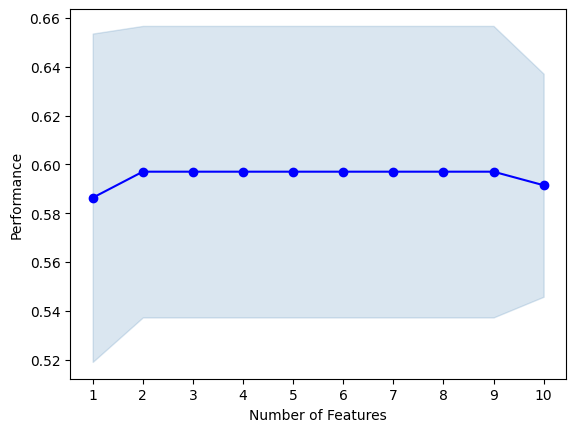

In [ ]:
sfs=SFS(model,k_features=10,forward=True,floating=True,cv=5)
sfs.fit(x_train,y_train)

l_cols=list(new_data1.columns)
temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
x_train_new=sfs.transform(x_train)
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)

y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.5698924731182796

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.59      0.54      0.57        48
     class 1       0.55      0.60      0.57        45

    accuracy                           0.57        93
   macro avg       0.57      0.57      0.57        93
weighted avg       0.57      0.57      0.57        93



**Class wise analysis**

In [ ]:
class_labels=[]
l_cols=taxonomy_arr

count_no_phyllum=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>2):
    if (temp[2] not in class_labels):
      class_labels.append(temp[2])

count_no_phyllum=0
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==2):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the class labels:-",count_no_phyllum)

print("No. of classes are:-",len(class_labels))
print(class_labels)

Number of Taxa without the class labels:- 116
No. of classes are:- 41
[' c__Gammaproteobacteria', ' c__Alphaproteobacteria', ' c__Negativicutes', ' c__Actinobacteria', ' c__Bacilli', ' c__Bacteroidia', ' c__Deinococci', ' c__Gracilibacteria', ' c__Bdellovibrionia', ' c__Vampirivibrionia', ' c__Fusobacteriia', ' c__Oligoflexia', ' c__Clostridia', ' c__Campylobacteria', ' c__Chlamydiae', ' c__Saccharimonadia', ' c__Parcubacteria', ' c__Thermoanaerobacteria', ' c__Verrucomicrobiae', ' c__Elusimicrobia', ' c__Desulfovibrionia', ' c__Polyangia', ' c__Lentisphaeria', ' c__ABY1', ' c__Acidobacteriae', ' c__Coriobacteriia', ' c__Omnitrophia', ' c__Myxococcia', ' c__Acidimicrobiia', ' c__Cyanobacteriia', ' c__Thermoleophilia', ' c__Anaerolineae', ' c__Chloroflexia', ' c__Methylomirabilia', ' c__Spirochaetia', ' c__Planctomycetes', ' c__Vicinamibacteria', ' c__Babeliae', ' c__Blastocatellia', ' c__OLB14', ' c__Berkelbacteria']


In [ ]:
temp_dict={}
for i in range(len(class_labels)):
  temp_dict[class_labels[i]]=0

temp_dict

{' c__Gammaproteobacteria': 0,
 ' c__Alphaproteobacteria': 0,
 ' c__Negativicutes': 0,
 ' c__Actinobacteria': 0,
 ' c__Bacilli': 0,
 ' c__Bacteroidia': 0,
 ' c__Deinococci': 0,
 ' c__Gracilibacteria': 0,
 ' c__Bdellovibrionia': 0,
 ' c__Vampirivibrionia': 0,
 ' c__Fusobacteriia': 0,
 ' c__Oligoflexia': 0,
 ' c__Clostridia': 0,
 ' c__Campylobacteria': 0,
 ' c__Chlamydiae': 0,
 ' c__Saccharimonadia': 0,
 ' c__Parcubacteria': 0,
 ' c__Thermoanaerobacteria': 0,
 ' c__Verrucomicrobiae': 0,
 ' c__Elusimicrobia': 0,
 ' c__Desulfovibrionia': 0,
 ' c__Polyangia': 0,
 ' c__Lentisphaeria': 0,
 ' c__ABY1': 0,
 ' c__Acidobacteriae': 0,
 ' c__Coriobacteriia': 0,
 ' c__Omnitrophia': 0,
 ' c__Myxococcia': 0,
 ' c__Acidimicrobiia': 0,
 ' c__Cyanobacteriia': 0,
 ' c__Thermoleophilia': 0,
 ' c__Anaerolineae': 0,
 ' c__Chloroflexia': 0,
 ' c__Methylomirabilia': 0,
 ' c__Spirochaetia': 0,
 ' c__Planctomycetes': 0,
 ' c__Vicinamibacteria': 0,
 ' c__Babeliae': 0,
 ' c__Blastocatellia': 0,
 ' c__OLB14': 0,
 '

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
org_data



['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]
for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>2):
      new_dict[temp[2]]=new_dict[temp[2]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))


temps_arr=np.array(temps_arr)
new_data=pd.DataFrame(temps_arr,columns=list(temp_dict.keys()),index=org_data.index)
print(temps_arr)

[[ 29   9   9 ...   0   0   0]
 [123  37  36 ...   0   0   0]
 [346 158   0 ...   0   0   0]
 ...
 [161   0   0 ...   0   0   0]
 [376  59   0 ...   0   0   0]
 [216 189   0 ...   0   0   0]]


In [ ]:
new_data1=copy.deepcopy(new_data)

print(new_data)
print(new_data1)

             c__Gammaproteobacteria   c__Alphaproteobacteria  \
SRR3991444                       29                        9   
SRR3991609                      123                       37   
SRR3991531                      346                      158   
SRR3991495                      527                       44   
SRR3991554                      462                      133   
...                             ...                      ...   
SRR3991502                      333                      103   
SRR3991543                      933                      226   
SRR3991594                      161                        0   
SRR3991499                      376                       59   
SRR3991582                      216                      189   

             c__Negativicutes   c__Actinobacteria   c__Bacilli  \
SRR3991444                  9                   2            0   
SRR3991609                 36                  54           26   
SRR3991531                  0    

In [ ]:
new_data.insert(loc=0,column="label",value=0.03)
new_data.insert(loc=1,column="Group",value=list(org_data.index))
new_data.insert(loc=2,column="numOtus",value=len(class_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_class.csv',index=False)
files.download('complete_class.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,c__Gammaproteobacteria,c__Alphaproteobacteria,c__Negativicutes,c__Actinobacteria,c__Bacilli,c__Bacteroidia,c__Deinococci,...,c__Chloroflexia,c__Methylomirabilia,c__Spirochaetia,c__Planctomycetes,c__Vicinamibacteria,c__Babeliae,c__Blastocatellia,c__OLB14,c__Berkelbacteria,treatment
SRR3991444,0.03,SRR3991444,41,29,9,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,41,123,37,36,54,26,51,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,41,346,158,0,63,105,204,1154,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,41,527,44,0,0,170,239,1121,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,41,462,133,0,6,170,83,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,41,333,103,0,147,125,32,1628,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,41,933,226,0,0,0,162,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991594,0.03,SRR3991594,41,161,0,0,0,1449,19,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,41,376,59,0,55,144,32,1003,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
class_data_adeno=new_data1[new_data1["labels"]==0]
class_data_squamous=new_data1[new_data1["labels"]==1]

class_data_adeno.to_csv('adeno_class.csv')
files.download('adeno_class.csv')

class_data_squamous.to_csv('squamous_class.csv')
files.download('squamous_class.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_np=np.array(new_data1)
x_data=new_data_np[:,0:len(new_data_np[0])-1]
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[' c__Negativicutes', ' c__Deinococci', ' c__Gracilibacteria', ' c__Bdellovibrionia', ' c__Fusobacteriia', ' c__Oligoflexia', ' c__Campylobacteria', ' c__Chlamydiae', ' c__Saccharimonadia', ' c__Thermoanaerobacteria', ' c__Elusimicrobia', ' c__Desulfovibrionia', ' c__Polyangia', ' c__Lentisphaeria', ' c__Acidobacteriae', ' c__Coriobacteriia', ' c__Omnitrophia', ' c__Myxococcia', ' c__Acidimicrobiia', ' c__Cyanobacteriia', ' c__Thermoleophilia', ' c__Anaerolineae', ' c__Chloroflexia', ' c__Methylomirabilia', ' c__Spirochaetia', ' c__Planctomycetes', ' c__Vicinamibacteria', ' c__Babeliae', ' c__Blastocatellia', ' c__Berkelbacteria']
CV Score for s:
0.6243243243243244


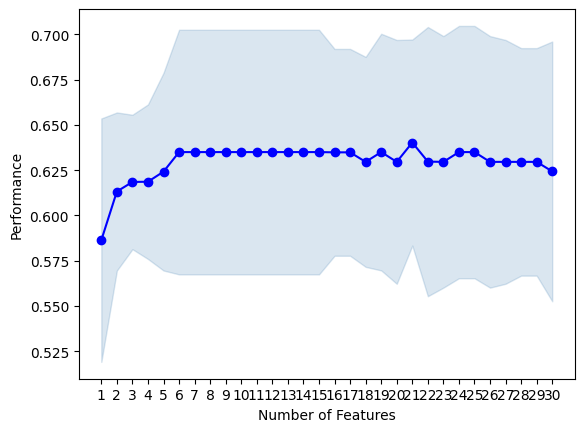

In [ ]:
l_cols=list(new_data1.columns)
numpy_data=np.array(new_data)

sfs=SFS(model,k_features=30,forward=True,floating=False,cv=5)
sfs.fit(x_train,y_train)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
x_train_new=sfs.transform(x_train)
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)

y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.5913978494623656

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.38      0.49        48
     class 1       0.55      0.82      0.66        45

    accuracy                           0.59        93
   macro avg       0.62      0.60      0.57        93
weighted avg       0.62      0.59      0.57        93



**Order wise analysis**

In [ ]:
order_labels=[]
l_cols=taxonomy_arr

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>3):
    if (temp[3] not in order_labels):
      order_labels.append(temp[3])

count_no_phyllum=0
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==3):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the order labels:-",count_no_phyllum)

print("No. of distinct order:-",len(order_labels))
print(order_labels)

Number of Taxa without the order labels:- 783
No. of distinct order:- 81
[' o__Burkholderiales', ' o__Rhizobiales', ' o__Veillonellales-Selenomonadales', ' o__Pseudomonadales', ' o__Lactobacillales', ' o__Sphingobacteriales', ' o__Flavobacteriales', ' o__Thermales', ' o__Cytophagales', ' o__Bacillales', ' o__Sphingomonadales', ' o__Bdellovibrionales', ' o__Obscuribacterales', ' o__Enterobacterales', ' o__Caulobacterales', ' o__Fusobacteriales', ' o__Propionibacteriales', ' o__Bacteroidales', ' o__Oligoflexales', ' o__Exiguobacterales', ' o__Micrococcales', ' o__Peptostreptococcales-Tissierellales', ' o__Staphylococcales', ' o__Lachnospirales', ' o__Pasteurellales', ' o__Campylobacterales', ' o__Rhodobacterales', ' o__Chlamydiales', ' o__Saccharimonadales', ' o__Candidatus_Kaiserbacteria', ' o__Thermoanaerobacterales', ' o__Frankiales', ' o__Xanthomonadales', ' o__Oscillospirales', ' o__Clostridiales', ' o__Verrucomicrobiales', ' o__Erysipelotrichales', ' o__Lineage_IV', ' o__Desulfovib

In [ ]:
temp_dict={}
for i in range(len(order_labels)):
  temp_dict[order_labels[i]]=0

temp_dict

{' o__Burkholderiales': 0,
 ' o__Rhizobiales': 0,
 ' o__Veillonellales-Selenomonadales': 0,
 ' o__Pseudomonadales': 0,
 ' o__Lactobacillales': 0,
 ' o__Sphingobacteriales': 0,
 ' o__Flavobacteriales': 0,
 ' o__Thermales': 0,
 ' o__Cytophagales': 0,
 ' o__Bacillales': 0,
 ' o__Sphingomonadales': 0,
 ' o__Bdellovibrionales': 0,
 ' o__Obscuribacterales': 0,
 ' o__Enterobacterales': 0,
 ' o__Caulobacterales': 0,
 ' o__Fusobacteriales': 0,
 ' o__Propionibacteriales': 0,
 ' o__Bacteroidales': 0,
 ' o__Oligoflexales': 0,
 ' o__Exiguobacterales': 0,
 ' o__Micrococcales': 0,
 ' o__Peptostreptococcales-Tissierellales': 0,
 ' o__Staphylococcales': 0,
 ' o__Lachnospirales': 0,
 ' o__Pasteurellales': 0,
 ' o__Campylobacterales': 0,
 ' o__Rhodobacterales': 0,
 ' o__Chlamydiales': 0,
 ' o__Saccharimonadales': 0,
 ' o__Candidatus_Kaiserbacteria': 0,
 ' o__Thermoanaerobacterales': 0,
 ' o__Frankiales': 0,
 ' o__Xanthomonadales': 0,
 ' o__Oscillospirales': 0,
 ' o__Clostridiales': 0,
 ' o__Verrucomicrob

In [ ]:
numpy_data=np.array(org_data)
print(l_cols)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]
for i in range(len(numpy_data)):

  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>3):
      new_dict[temp[3]]=new_dict[temp[3]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)
new_data=pd.DataFrame(temps_arr,columns=list(temp_dict.keys()),index=org_data.index)
print(temps_arr)

[[ 27   9   9 ...   0   0   0]
 [123  22  36 ...   0   0   0]
 [115  82   0 ...   0   0   0]
 ...
 [ 73   0   0 ...   0   0   0]
 [ 61   0   0 ...   0   0   0]
 [156  59   0 ...   0   0   0]]


In [ ]:
new_data1=copy.deepcopy(new_data)
print(new_data1)
print(new_data)

             o__Burkholderiales   o__Rhizobiales  \
SRR3991444                   27                9   
SRR3991609                  123               22   
SRR3991531                  115               82   
SRR3991495                  320               20   
SRR3991554                  411                0   
...                         ...              ...   
SRR3991502                  116               39   
SRR3991543                  933              133   
SRR3991594                   73                0   
SRR3991499                   61                0   
SRR3991582                  156               59   

             o__Veillonellales-Selenomonadales   o__Pseudomonadales  \
SRR3991444                                   9                    2   
SRR3991609                                  36                    0   
SRR3991531                                   0                  205   
SRR3991495                                   0                  165   
SRR3991554          

In [ ]:
new_data.insert(loc=0,column="label",value=0.03)
new_data.insert(loc=1,column="Group",value=list(org_data.index))
new_data.insert(loc=2,column="numOtus",value=len(order_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_order.csv',index=False)
files.download('complete_order.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,o__Burkholderiales,o__Rhizobiales,o__Veillonellales-Selenomonadales,o__Pseudomonadales,o__Lactobacillales,o__Sphingobacteriales,o__Flavobacteriales,...,o__Pyrinomonadales,o__Candidatus_Staskawiczbacteria,o__Cyanobacteriales,o__Candidatus_Peribacteria,o__Mycoplasmatales,o__OLB14,o__Thermomicrobiales,o__Berkelbacteria,o__Chthoniobacterales,treatment
SRR3991444,0.03,SRR3991444,81,27,9,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,81,123,22,36,0,26,25,26,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,81,115,82,0,205,11,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,81,320,20,0,165,147,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,81,411,0,0,51,0,0,83,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,81,116,39,0,215,6,0,32,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,81,933,133,0,0,0,0,162,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991594,0.03,SRR3991594,81,73,0,0,18,1449,0,19,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,81,61,0,0,315,121,0,32,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
order_data_adeno=new_data1[new_data1["labels"]==0]
order_data_squamous=new_data1[new_data1["labels"]==1]

order_data_adeno.to_csv('adeno_order.csv')
files.download('adeno_order.csv')

order_data_squamous.to_csv('squamous_order.csv')
files.download('squamous_order.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_np=np.array(new_data1)
x_data=new_data_np[:,0:len(new_data_np[0])-1]
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[' o__Rhizobiales', ' o__Exiguobacterales', ' o__Micrococcales', ' o__Thermoanaerobacterales', ' o__Clostridiales', ' o__Verrucomicrobiales', ' o__Desulfovibrionales', ' o__Rhodospirillales', ' o__Omnitrophales', ' o__Bacteriovoracales', ' o__0319-6G20', ' o__Chitinophagales', ' o__Steroidobacterales', ' o__Solirubrobacterales', ' o__Kallotenuales', ' o__Paenibacillales', ' o__Gastranaerophilales', ' o__Babeliales', ' o__OLB14', ' o__Thermomicrobiales']
CV Score for s:
0.6935988620199146


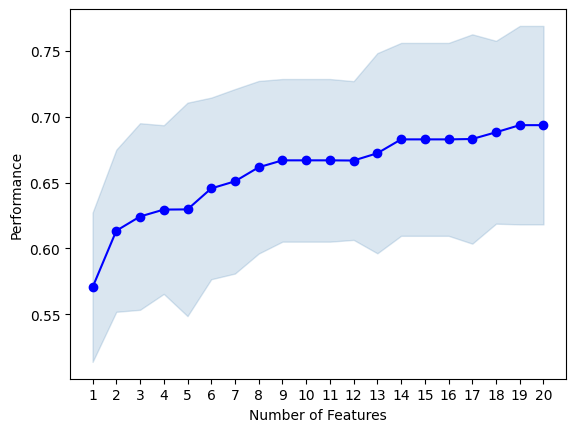

In [ ]:
l_cols=list(new_data1.columns)

sfs=SFS(model,k_features=20,forward=True,floating=False,cv=5)
sfs.fit(x_train,y_train)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
x_train_new=sfs.transform(x_train)
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)

y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.6344086021505376

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.58      0.62        48
     class 1       0.61      0.69      0.65        45

    accuracy                           0.63        93
   macro avg       0.64      0.64      0.63        93
weighted avg       0.64      0.63      0.63        93



**Family Based Analysis**

In [ ]:
family_labels=[]
l_cols=taxonomy_arr

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>4):
    if (temp[4] not in family_labels):
      family_labels.append(temp[4])


count_no_phyllum=0
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==4):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the family labels:-",count_no_phyllum)

print("No. of distinct family:-",len(family_labels))
print(family_labels)

Number of Taxa without the family labels:- 509
No. of distinct family:- 112
[' f__Burkholderiaceae', ' f__Comamonadaceae', ' f__Veillonellaceae', ' f__Moraxellaceae', ' f__Carnobacteriaceae', ' f__Sphingobacteriaceae', ' f__Weeksellaceae', ' f__Thermaceae', ' f__Spirosomaceae', ' f__Hymenobacteraceae', ' f__Bacillaceae', ' f__Sphingomonadaceae', ' f__Bdellovibrionaceae', ' f__Obscuribacteraceae', ' f__Caulobacteraceae', ' f__Fusobacteriaceae', ' f__Streptococcaceae', ' f__Pseudomonadaceae', ' f__Nocardioidaceae', ' f__Marinifilaceae', ' f__Prevotellaceae', ' f__Lactobacillaceae', ' f__Oligoflexales', ' f__Leuconostocaceae', ' f__Exiguobacteraceae', ' f__Oxalobacteraceae', ' f__Peptostreptococcales-Tissierellales', ' f__Staphylococcaceae', ' f__Lachnospiraceae', ' f__Pasteurellaceae', ' f__Helicobacteraceae', ' f__Rhodobacteraceae', ' f__Simkaniaceae', ' f__Flavobacteriaceae', ' f__Candidatus_Kaiserbacteria', ' f__Family_III', ' f__Rikenellaceae', ' f__Sporichthyaceae', ' f__Xanthomonad

In [ ]:
temp_dict={}
for i in range(len(family_labels)):
  temp_dict[family_labels[i]]=0

temp_dict

{' f__Burkholderiaceae': 0,
 ' f__Comamonadaceae': 0,
 ' f__Veillonellaceae': 0,
 ' f__Moraxellaceae': 0,
 ' f__Carnobacteriaceae': 0,
 ' f__Sphingobacteriaceae': 0,
 ' f__Weeksellaceae': 0,
 ' f__Thermaceae': 0,
 ' f__Spirosomaceae': 0,
 ' f__Hymenobacteraceae': 0,
 ' f__Bacillaceae': 0,
 ' f__Sphingomonadaceae': 0,
 ' f__Bdellovibrionaceae': 0,
 ' f__Obscuribacteraceae': 0,
 ' f__Caulobacteraceae': 0,
 ' f__Fusobacteriaceae': 0,
 ' f__Streptococcaceae': 0,
 ' f__Pseudomonadaceae': 0,
 ' f__Nocardioidaceae': 0,
 ' f__Marinifilaceae': 0,
 ' f__Prevotellaceae': 0,
 ' f__Lactobacillaceae': 0,
 ' f__Oligoflexales': 0,
 ' f__Leuconostocaceae': 0,
 ' f__Exiguobacteraceae': 0,
 ' f__Oxalobacteraceae': 0,
 ' f__Peptostreptococcales-Tissierellales': 0,
 ' f__Staphylococcaceae': 0,
 ' f__Lachnospiraceae': 0,
 ' f__Pasteurellaceae': 0,
 ' f__Helicobacteraceae': 0,
 ' f__Rhodobacteraceae': 0,
 ' f__Simkaniaceae': 0,
 ' f__Flavobacteriaceae': 0,
 ' f__Candidatus_Kaiserbacteria': 0,
 ' f__Family_II

In [ ]:
numpy_data=np.array(org_data)
print(l_cols)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]
for i in range(len(numpy_data)):

  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>4):
      new_dict[temp[4]]=new_dict[temp[4]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)
new_data=pd.DataFrame(temps_arr,columns=list(temp_dict.keys()),index=org_data.index)
print(temps_arr)

[[ 4  5  9 ...  0  0  0]
 [18 35 36 ...  0  0  0]
 [ 5 83  0 ...  0  0  0]
 ...
 [ 8  3  0 ...  0  0  0]
 [20 12  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]]


In [ ]:
new_data1=copy.deepcopy(new_data)

print(new_data1)
print(new_data)

             f__Burkholderiaceae   f__Comamonadaceae   f__Veillonellaceae  \
SRR3991444                     4                   5                    9   
SRR3991609                    18                  35                   36   
SRR3991531                     5                  83                    0   
SRR3991495                    74                  64                    0   
SRR3991554                     0                 364                    0   
...                          ...                 ...                  ...   
SRR3991502                     0                 116                    0   
SRR3991543                     0                 753                    0   
SRR3991594                     8                   3                    0   
SRR3991499                    20                  12                    0   
SRR3991582                     0                  38                    0   

             f__Moraxellaceae   f__Carnobacteriaceae   f__Sphingobacteriace

In [ ]:
new_data.insert(loc=0,column="label",value=0.03)
new_data.insert(loc=1,column="Group",value=list(org_data.index))
new_data.insert(loc=2,column="numOtus",value=len(family_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_family.csv',index=False)
files.download('complete_family.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,f__Burkholderiaceae,f__Comamonadaceae,f__Veillonellaceae,f__Moraxellaceae,f__Carnobacteriaceae,f__Sphingobacteriaceae,f__Weeksellaceae,...,f__Aerococcaceae,f__Candidatus_Peribacteria,f__Mycoplasmataceae,f__OLB14,f__JG30-KF-CM45,f__Berkelbacteria,f__Microscillaceae,f__Eggerthellaceae,f__Dysgonomonadaceae,treatment
SRR3991444,0.03,SRR3991444,112,4,5,9,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,112,18,35,36,0,21,25,26,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,112,5,83,0,193,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,112,74,64,0,163,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,112,0,364,0,44,0,0,83,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,112,0,116,0,214,0,0,2,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,112,0,753,0,0,0,0,162,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991594,0.03,SRR3991594,112,8,3,0,0,0,0,19,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,112,20,12,0,315,0,0,32,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
order_data_adeno=new_data1[new_data1["labels"]==0]
order_data_squamous=new_data1[new_data1["labels"]==1]

order_data_adeno.to_csv('adeno_family.csv')
files.download('adeno_family.csv')

order_data_squamous.to_csv('squamous_family.csv')
files.download('squamous_family.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_np=np.array(new_data1)
x_data=new_data_np[:,0:len(new_data_np[0])-1]
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[' f__Moraxellaceae', ' f__Sphingomonadaceae', ' f__Nocardioidaceae', ' f__Lactobacillaceae', ' f__Oligoflexales', ' f__Exiguobacteraceae', ' f__Oxalobacteraceae', ' f__Simkaniaceae', ' f__Clostridiaceae', ' f__Lineage_IV', ' f__Tannerellaceae', ' f__uncultured', ' f__Bacteriovoracaceae', ' f__Peptostreptococcaceae', ' f__Gracilibacteria', ' f__Rhizobiaceae', ' f__Rokubacteriales', ' f__Clostridia_UCG-014', ' f__Vicinamibacteraceae', ' f__env.OPS_17']
CV Score for s:
0.7099573257467995


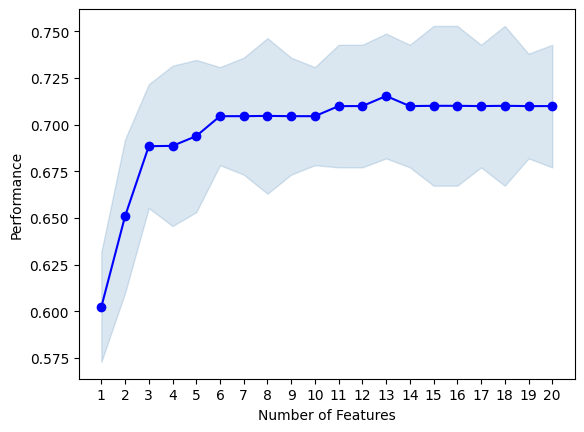

In [ ]:
l_cols=list(new_data1.columns)

sfs=SFS(model,k_features=20,forward=True,floating=False,cv=5)
sfs.fit(x_train,y_train)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:

x_train_new=sfs.transform(x_train)
model=RandomForestClassifier()
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)


y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.5268817204301075

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.48      0.51        48
     class 1       0.51      0.58      0.54        45

    accuracy                           0.53        93
   macro avg       0.53      0.53      0.53        93
weighted avg       0.53      0.53      0.53        93



**Genus Based Analysis**

In [ ]:
genus_labels=[]
l_cols=taxonomy_arr

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>5):
    if (temp[5] not in genus_labels):
      genus_labels.append(temp[5])

count_no_phyllum=0
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==5):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the Genus labels:-",count_no_phyllum)

print("No. of distinct Genus:-",len(genus_labels))
print(genus_labels)

Number of Taxa without the Genus labels:- 867
No. of distinct Genus:- 105
[' g__Veillonella', ' g__Acinetobacter', ' g__Sphingobacterium', ' g__Cloacibacterium', ' g__Thermus', ' g__Spirosoma', ' g__Hymenobacter', ' g__Geobacillus', ' g__Bdellovibrio', ' g__Fusobacterium', ' g__Pseudomonas', ' g__Nocardioides', ' g__Odoribacter', ' g__Streptococcus', ' g__Lactobacillus', ' g__Oligoflexus', ' g__Bacillus', ' g__Exiguobacterium', ' g__Anaerococcus', ' g__Staphylococcus', ' g__Helicobacter', ' g__Paracoccus', ' g__Chryseobacterium', ' g__Peptoniphilus', ' g__Flavobacterium', ' g__Candidatus_Kaiserbacteria', ' g__Thermoanaerobacterium', ' g__Alistipes', ' g__Atopostipes', ' g__Blautia', ' g__Bacteroides', ' g__Megamonas', ' g__Akkermansia', ' g__Asteroleplasma', ' g__Butyricicoccus', ' g__Lineage_IV', ' g__Parabacteroides', ' g__Victivallaceae', ' g__uncultured', ' g__[Eubacterium]_coprostanoligenes_group', ' g__Barnesiella', ' g__Prevotella', ' g__cvE6', ' g__Collinsella', ' g__Prevotella

In [ ]:
temp_dict={}
for i in range(len(genus_labels)):
  temp_dict[genus_labels[i]]=0

temp_dict

{' g__Veillonella': 0,
 ' g__Acinetobacter': 0,
 ' g__Sphingobacterium': 0,
 ' g__Cloacibacterium': 0,
 ' g__Thermus': 0,
 ' g__Spirosoma': 0,
 ' g__Hymenobacter': 0,
 ' g__Geobacillus': 0,
 ' g__Bdellovibrio': 0,
 ' g__Fusobacterium': 0,
 ' g__Pseudomonas': 0,
 ' g__Nocardioides': 0,
 ' g__Odoribacter': 0,
 ' g__Streptococcus': 0,
 ' g__Lactobacillus': 0,
 ' g__Oligoflexus': 0,
 ' g__Bacillus': 0,
 ' g__Exiguobacterium': 0,
 ' g__Anaerococcus': 0,
 ' g__Staphylococcus': 0,
 ' g__Helicobacter': 0,
 ' g__Paracoccus': 0,
 ' g__Chryseobacterium': 0,
 ' g__Peptoniphilus': 0,
 ' g__Flavobacterium': 0,
 ' g__Candidatus_Kaiserbacteria': 0,
 ' g__Thermoanaerobacterium': 0,
 ' g__Alistipes': 0,
 ' g__Atopostipes': 0,
 ' g__Blautia': 0,
 ' g__Bacteroides': 0,
 ' g__Megamonas': 0,
 ' g__Akkermansia': 0,
 ' g__Asteroleplasma': 0,
 ' g__Butyricicoccus': 0,
 ' g__Lineage_IV': 0,
 ' g__Parabacteroides': 0,
 ' g__Victivallaceae': 0,
 ' g__uncultured': 0,
 ' g__[Eubacterium]_coprostanoligenes_group': 0

In [ ]:
numpy_data=np.array(org_data)
print(l_cols)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]
for i in range(len(numpy_data)):

  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>5):
      new_dict[temp[5]]=new_dict[temp[5]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)
new_data=pd.DataFrame(temps_arr,columns=list(temp_dict.keys()),index=org_data.index)
print(temps_arr)

[[  5   2   0 ...   0   0   0]
 [ 16   0  25 ...   0   0   0]
 [  0  44   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0 143   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
new_data1=copy.deepcopy(new_data)
print(new_data1)
print(new_data)

             g__Veillonella   g__Acinetobacter   g__Sphingobacterium  \
SRR3991444                5                  2                     0   
SRR3991609               16                  0                    25   
SRR3991531                0                 44                     0   
SRR3991495                0                 25                     0   
SRR3991554                0                 43                     0   
...                     ...                ...                   ...   
SRR3991502                0                128                     0   
SRR3991543                0                  0                     0   
SRR3991594                0                  0                     0   
SRR3991499                0                143                     0   
SRR3991582                0                  0                     0   

             g__Cloacibacterium   g__Thermus   g__Spirosoma   g__Hymenobacter  \
SRR3991444                    0            0          

In [ ]:
new_data.insert(loc=0,column="label",value=0.03)
new_data.insert(loc=1,column="Group",value=list(org_data.index))
new_data.insert(loc=2,column="numOtus",value=len(genus_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_genus.csv',index=False)
files.download('complete_genus.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,g__Veillonella,g__Acinetobacter,g__Sphingobacterium,g__Cloacibacterium,g__Thermus,g__Spirosoma,g__Hymenobacter,...,g__Empedobacter,g__Candidatus_Peribacteria,g__Brachymonas,g__Mycoplasma,g__OLB14,g__JG30-KF-CM45,g__Berkelbacteria,g__Cryptobacterium,g__Proteiniphilum,treatment
SRR3991444,0.03,SRR3991444,105,5,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,105,16,0,25,11,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,105,0,44,0,0,1154,115,89,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,105,0,25,0,0,1121,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,105,0,43,0,37,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,105,0,128,0,0,1628,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,105,0,0,0,162,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991594,0.03,SRR3991594,105,0,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,105,0,143,0,0,1003,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
order_data_adeno=new_data1[new_data1["labels"]==0]
order_data_squamous=new_data1[new_data1["labels"]==1]

order_data_adeno.to_csv('adeno_genus.csv')
files.download('adeno_genus.csv')

order_data_squamous.to_csv('squamous_genus.csv')
files.download('squamous_genus.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_np=np.array(new_data1)
x_data=new_data_np[:,0:len(new_data_np[0])-1]
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[' g__Thermus', ' g__Hymenobacter', ' g__Fusobacterium', ' g__Pseudomonas', ' g__Nocardioides', ' g__Odoribacter', ' g__Bacillus', ' g__Chryseobacterium', ' g__Butyricicoccus', ' g__Parabacteroides', ' g__uncultured', ' g__Prevotella', ' g__Prevotellaceae_NK3B31_group', ' g__0319-6G20', ' g__Limnohabitans', ' g__JGI_0000069-P22', ' g__Paenibacillus', ' g__Caenarcaniphilales', ' g__Aerococcus', ' g__JG30-KF-CM45']
CV Score for s:
0.7314366998577525


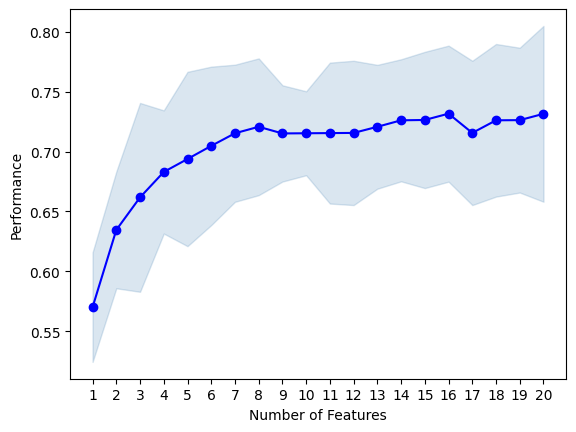

In [ ]:
l_cols=list(new_data1.columns)

sfs=SFS(model,k_features=20,forward=True,floating=False,cv=5)
sfs.fit(x_train,y_train)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
x_train_new=sfs.transform(x_train)
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)

y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.5806451612903226

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.56      0.58        48
     class 1       0.56      0.60      0.58        45

    accuracy                           0.58        93
   macro avg       0.58      0.58      0.58        93
weighted avg       0.58      0.58      0.58        93



**Species Wise Analysis**

In [ ]:
species_labels=[]
l_cols=taxonomy_arr

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>6):
    if (temp[6] not in species_labels):
      species_labels.append(temp[6])


count_no_phyllum=0
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==6):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the species labels:-",count_no_phyllum)

print("No. of distinct Species:-",len(species_labels))
print(species_labels)

Number of Taxa without the species labels:- 882
No. of distinct Species:- 12
[' s__uncultured_bacterium', ' s__uncultured_organism', ' s__uncultured_beta', ' s__uncultured_soil', ' s__Alloprevotella_tannerae', ' s__Candidatus_Komeilibacteria', ' s__SR1_bacterium', ' s__Clostridiales_bacterium', ' s__gut_metagenome', ' s__Sediminibacterium_sp.', ' s__metagenome', ' s__uncultured_epsilon']


In [ ]:
temp_dict={}
for i in range(len(species_labels)):
  temp_dict[species_labels[i]]=0

temp_dict

{' s__uncultured_bacterium': 0,
 ' s__uncultured_organism': 0,
 ' s__uncultured_beta': 0,
 ' s__uncultured_soil': 0,
 ' s__Alloprevotella_tannerae': 0,
 ' s__Candidatus_Komeilibacteria': 0,
 ' s__SR1_bacterium': 0,
 ' s__Clostridiales_bacterium': 0,
 ' s__gut_metagenome': 0,
 ' s__Sediminibacterium_sp.': 0,
 ' s__metagenome': 0,
 ' s__uncultured_epsilon': 0}

In [ ]:
numpy_data=np.array(org_data)
print(l_cols)
org_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

,0,1,2,3,4,5,6,7,8,9,...,3598,3599,3600,3601,3602,3603,3604,3605,3606,label
SRR3991444,6,4,3,3,3,3,3,2,2,2,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0,3,1,0,0,0,3,0,5,7,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,1,0,0,0,4,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,13,19,3,0,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0,0,3,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0,0,23,0,50,0,0,0,0,0,...,0,0,36,27,25,24,24,23,19,Squamous
SRR3991594,3,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,3,4,0,0,0,0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
temps_arr=[]
for i in range(len(numpy_data)):

  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>6):
      new_dict[temp[6]]=new_dict[temp[6]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)
new_data=pd.DataFrame(temps_arr,columns=list(temp_dict.keys()),index=org_data.index)
print(temps_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
new_data1=copy.deepcopy(new_data)
print(new_data1)
print(new_data)

             s__uncultured_bacterium   s__uncultured_organism  \
SRR3991444                         0                        0   
SRR3991609                         0                        0   
SRR3991531                         0                        0   
SRR3991495                         0                        0   
SRR3991554                         0                        0   
...                              ...                      ...   
SRR3991502                         0                        0   
SRR3991543                         0                        0   
SRR3991594                         0                        0   
SRR3991499                         0                        0   
SRR3991582                         0                        0   

             s__uncultured_beta   s__uncultured_soil  \
SRR3991444                    0                    0   
SRR3991609                    0                    0   
SRR3991531                    0                    

In [ ]:
new_data.insert(loc=0,column="label",value=0.03)
new_data.insert(loc=1,column="Group",value=list(org_data.index))
new_data.insert(loc=2,column="numOtus",value=len(species_labels))
new_data['treatment']=list(org_data["label"])

new_data1['labels']=list(stan_data["label"])

new_data1.to_csv('complete_species.csv',index=False)
files.download('complete_species.csv')
new_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,label,Group,numOtus,s__uncultured_bacterium,s__uncultured_organism,s__uncultured_beta,s__uncultured_soil,s__Alloprevotella_tannerae,s__Candidatus_Komeilibacteria,s__SR1_bacterium,s__Clostridiales_bacterium,s__gut_metagenome,s__Sediminibacterium_sp.,s__metagenome,s__uncultured_epsilon,treatment
SRR3991444,0.03,SRR3991444,12,0,0,0,0,0,0,0,0,0,0,0,0,Squamous
SRR3991609,0.03,SRR3991609,12,0,0,0,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991531,0.03,SRR3991531,12,0,0,0,0,0,0,0,0,0,0,0,0,Squamous
SRR3991495,0.03,SRR3991495,12,0,0,0,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991554,0.03,SRR3991554,12,0,0,0,0,0,0,0,0,0,0,0,0,Squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR3991502,0.03,SRR3991502,12,0,0,0,0,0,0,0,0,0,0,0,0,Adenocarcinoma
SRR3991543,0.03,SRR3991543,12,0,0,0,0,0,0,0,0,0,0,0,0,Squamous
SRR3991594,0.03,SRR3991594,12,0,0,0,0,0,0,0,0,0,0,0,0,Squamous
SRR3991499,0.03,SRR3991499,12,0,0,0,0,0,0,0,0,0,0,0,0,Adenocarcinoma


In [ ]:
order_data_adeno=new_data1[new_data1["labels"]==0]
order_data_squamous=new_data1[new_data1["labels"]==1]

order_data_adeno.to_csv('adeno_species.csv')
files.download('adeno_species.csv')

order_data_squamous.to_csv('squamous_species.csv')
files.download('squamous_species.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data_np=np.array(new_data1)
x_data=new_data_np[:,0:len(new_data_np[0])-1]
y_data=new_data_np[:,len(new_data_np[0])-1].astype(int)
y_data=y_data.ravel()
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,shuffle=True, random_state=42)

[' s__uncultured_bacterium', ' s__uncultured_organism', ' s__uncultured_beta', ' s__uncultured_soil', ' s__Alloprevotella_tannerae', ' s__Candidatus_Komeilibacteria', ' s__gut_metagenome', ' s__Sediminibacterium_sp.', ' s__metagenome', ' s__uncultured_epsilon']
CV Score for s:
0.49459459459459465


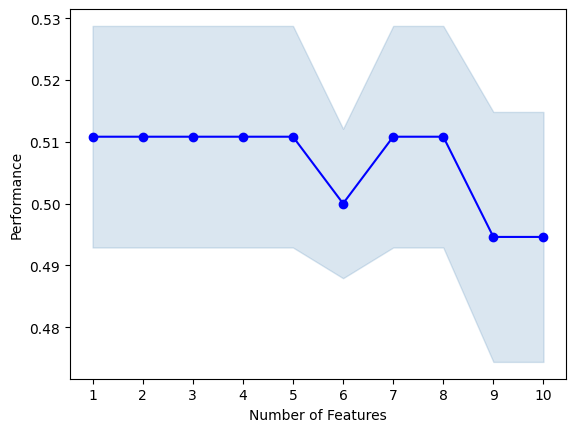

In [ ]:
l_cols=list(new_data1.columns)

sfs=SFS(model,k_features=10,forward=True,floating=False,cv=5)
sfs.fit(x_train,y_train)

temp_index=sfs.k_feature_idx_
temp_cols=l_cols
chosen_features=[]
for i in range(len(temp_index)):
  chosen_features.append(temp_cols[temp_index[i]])

print(chosen_features)


print('CV Score for s:')
print(sfs.k_score_)

fig1=plot_sfs(sfs.get_metric_dict())
plt.show()

In [ ]:
x_train_new=sfs.transform(x_train)
model.fit(x_train_new,y_train)

x_test=sfs.transform(x_test)

y_pred=model.predict(x_test)

model.score(x_test,y_test)

0.5161290322580645

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.52      0.98      0.68        48
     class 1       0.50      0.02      0.04        45

    accuracy                           0.52        93
   macro avg       0.51      0.50      0.36        93
weighted avg       0.51      0.52      0.37        93

